Reference: https://sebastianraschka.com/Articles/2014_python_lda.html

### Load Dataset:

In [44]:
from  sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
X,y = load_digits(n_class=2, return_X_y=True)

In [4]:
X.shape

(360, 64)

In [5]:
X.max()

16.0

In [9]:
X /= X.max()

In [10]:
X.max()

1.0

In [11]:
X.min()

0.0

In [12]:
y.shape

(360,)

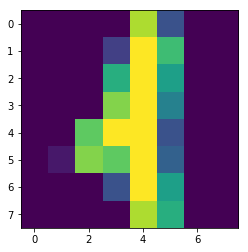

In [35]:
idx = random.choice(range(len(X)))
disp = X[idx].reshape((8,8))*255.
plt.imshow(disp)

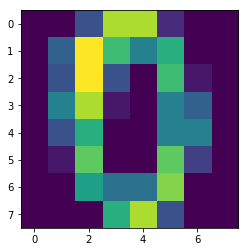

In [36]:
idx = random.choice(range(len(X)))
disp = X[idx].reshape((8,8))*255.
plt.imshow(disp)

In [63]:
M,N = X.shape
clss = list(set(y))
n_cls = len(clss)

### First, we need to calculate the mean vector for each feature for each class:

In [64]:

mean_vecs = {}

for cls in clss:
    sub_dat = X[y==cls]
    mean_vec = sub_dat.mean(axis=0)
    mean_vecs[cls] = mean_vec

    

### Then, we need to calculate the within-class scatter matrices

In [73]:
wc_mat = np.zeros((N,N))# 64x64

In [74]:
for cls in clss:
    sub_dat = X[y==cls]
    for row in sub_dat:
        val,mn = row.reshape(-1,1),mean_vecs[cls].reshape(-1,1)
        wc_mat +=  np.dot((val-mn),(val-mn).T)

In [75]:
wc_mat.shape

(64, 64)

### And between Class scatter matrix:

In [77]:
grand_mn = X.mean(axis=0)
bc_mat = np.zeros((N,N))# 64x64

In [78]:
for cls in clss:
    sub_dat = X[y==cls]
    for row in sub_dat:
        mn = mean_vecs[cls].reshape(-1,1)
        bc_mat +=  np.dot((mn-grand_mn),(mn-grand_mn).T)

In [79]:
bc_mat.shape

(64, 64)

### Find eigen -val and -vec:

In [93]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.pinv(wc_mat).dot(bc_mat))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(N,1)   
#     print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.5f}'.format(i, eig_vals[i].real))

Eigenvalue 0: 1285352.21785
Eigenvalue 1: 3198.59221
Eigenvalue 2: 2276.91864
Eigenvalue 3: -0.00000
Eigenvalue 4: 0.00000
Eigenvalue 5: 0.00000
Eigenvalue 6: 0.00000
Eigenvalue 7: 0.00000
Eigenvalue 8: -0.00000
Eigenvalue 9: -0.00000
Eigenvalue 10: -0.00000
Eigenvalue 11: -0.00000
Eigenvalue 12: -0.00000
Eigenvalue 13: 0.00000
Eigenvalue 14: 0.00000
Eigenvalue 15: 0.00000
Eigenvalue 16: 0.00000
Eigenvalue 17: 0.00000
Eigenvalue 18: 0.00000
Eigenvalue 19: -0.00000
Eigenvalue 20: -0.00000
Eigenvalue 21: 0.00000
Eigenvalue 22: 0.00000
Eigenvalue 23: -0.00000
Eigenvalue 24: -0.00000
Eigenvalue 25: -0.00000
Eigenvalue 26: -0.00000
Eigenvalue 27: -0.00000
Eigenvalue 28: -0.00000
Eigenvalue 29: 0.00000
Eigenvalue 30: 0.00000
Eigenvalue 31: -0.00000
Eigenvalue 32: -0.00000
Eigenvalue 33: -0.00000
Eigenvalue 34: 0.00000
Eigenvalue 35: 0.00000
Eigenvalue 36: 0.00000
Eigenvalue 37: 0.00000
Eigenvalue 38: 0.00000
Eigenvalue 39: -0.00000
Eigenvalue 40: -0.00000
Eigenvalue 41: 0.00000
Eigenvalue 42

In [100]:
final_mat = eig_vecs[:2].reshape(-1,2)

In [128]:
new_X = X.dot(final_mat)

In [129]:
new_X.shape

(360, 2)

In [130]:
new_X = np.concatenate([new_X,y.reshape(-1,1)],axis=1)

In [131]:
new_X.shape

(360, 3)

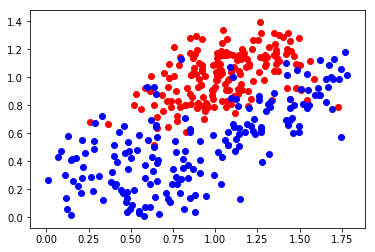

In [135]:
col = ['red','blue']
for i in [0,1]:
    s = new_X[new_X[:,2]==i]


    plt.scatter(x = s[:,0],y = s[:,1],color=col[i])